In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [11]:
from qiskit import *
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

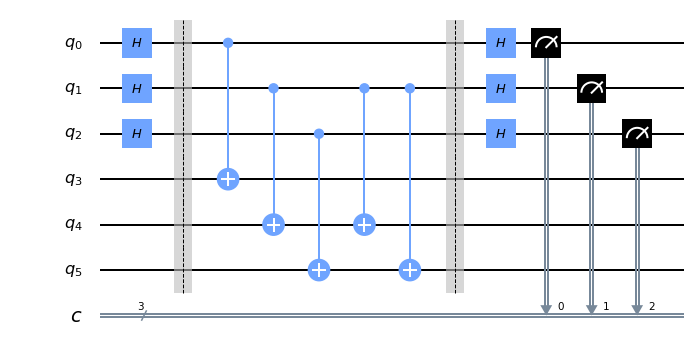

In [12]:
b = '110'
n = len(b)
simon_circuit = QuantumCircuit(n*2,n)
simon_circuit.h(range(n))
simon_circuit.barrier()
simon_circuit += simon_oracle(b)
simon_circuit.barrier()
simon_circuit.h(range(n))
simon_circuit.measure(range(n),range(n))
simon_circuit.draw()

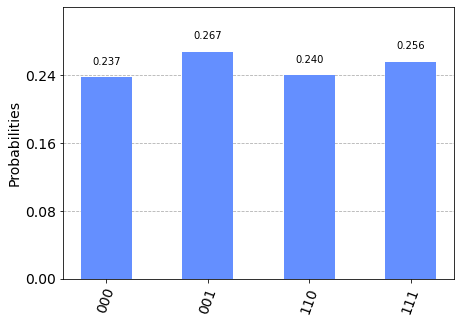

In [13]:
backend = BasicAer.get_backend('qasm_simulator')
result = execute(simon_circuit,backend,shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

In [14]:
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )

110.110 = 0 (mod 2)
110.111 = 0 (mod 2)
110.000 = 0 (mod 2)
110.001 = 0 (mod 2)


In [1]:
from qiskit import IBMQ

IBMQ.load_account()
IBMQ.providers()  

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [2]:
IBMQ.get_provider(hub='ibm-q')

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [4]:
backend = provider.get_backend('ibmq_16_melbourne')
backend

<IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
provider.backends(filters=lambda x: x.configuration().n_qubits >= 10
                                    and not x.configuration().simulator
                                    and x.status().operational==True)

[<IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [7]:
from qiskit.providers.ibmq import least_busy

small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits == 5
                                   and not x.configuration().simulator)
least_busy(small_devices)

<IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>

In [15]:
from qiskit import *
job = execute(simon_circuit, backend)

In [17]:
results = job.result()

In [18]:
counts = results.get_counts()

In [19]:
print(counts)

{'110': 246, '111': 262, '000': 243, '001': 273}
